# mehmetfatih

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
prices = pd.read_csv('dataset/house_prices.csv', index_col=0)
prices.tail(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
high=prices.corr().SalePrice.abs().sort_values(ascending=False).index[0:11]
high

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

(0, 11)

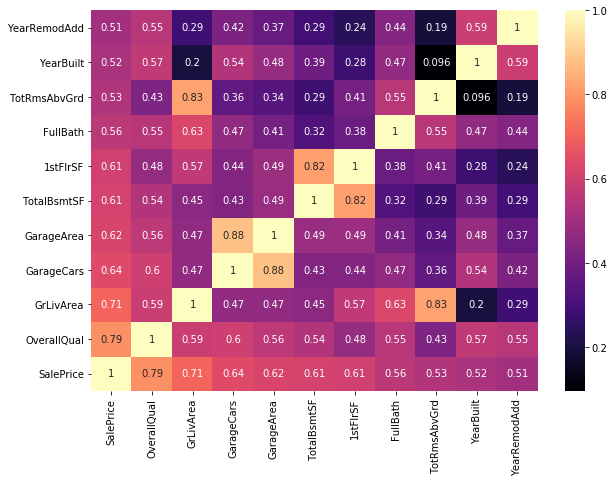

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(prices[high].corr(),cmap='magma', annot=True)
plt.ylim(0,11)

In [5]:
prices[high].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
SalePrice       1460 non-null int64
OverallQual     1460 non-null int64
GrLivArea       1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
dtypes: int64(11)
memory usage: 136.9 KB


In [6]:
prices[high].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [7]:
Y = prices['SalePrice']
X = prices[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 1.96045898e+04  5.12971178e+01  1.04179010e+04  1.49475334e+01
  1.98650991e+01  1.41737355e+01 -6.79087146e+03  3.31050771e+01
  2.68240707e+02  2.96481161e+02]
Sabit değer (bias): 
 -1186193.7666661367


In [9]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:54:11   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

WORK FİNİSHED.